#### 비지도학습
##### 1. 군집화
* 비지도학습은 데이터의 구조를 파악해서 그룹핑을 하거나 차원을 축소하거나 할때 사용하는 학습방식
* 1. 클러스터링 : 비슷한 유형의 데이터들을 그룹핑 해주는 학습방법
* 2. 클러스터링을 지원하는 알고리즘은 K-Means 가 있다. 

##### 2. 차원축소
* 비지도 학습을 통해서 데이터를 변환하는 방식
* 데이터를 변환(차원축소)하는 이유는?
 - 데이터를 시각화하거나, 데이터를 압축, 지도학습에 사용하기 위해서 정보가 더 잘 나타나도록 하기 위해서이다. 
* 차원축소를 지원하는 알고리즘은 PCA(Principal Component Analysis)가 있다. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

#%matplotlib inline

In [2]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris.target_names)
iris.target

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(iris.data.shape)
print(iris.feature_names)
iris.data

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [90]:
iris_df = pd.DataFrame(data=iris.data, \
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
#Model 생성 - KMeans 알고리즘 사용
model = KMeans(max_iter=500, n_clusters=3, random_state=0)
model.fit(iris_df)

KMeans(max_iter=500, n_clusters=3, random_state=0)

In [92]:
#군집화한 결과 확인
print(model.labels_)
print(model.inertia_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
78.851441426146


In [93]:
#군집화한 결과(labels_) 를 cluster라는 컬럼으로 추가
iris_df['cluster'] = model.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [94]:
#target 값으로 target 컬럼을 추가
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


### Intertia value를 이용한 적정 군집수 판단
* Intertia value는 중심점(centroid)에서 데이터간의 거리를 합산한 값이며, 군집의 응집도를 나타내는 값이다.  이 값을 작을수록 응집도가 높게 군집화가 잘 되었다는 의미
* 1  ~ 10개의 클러스로 클러스터링을 했을 각 클러스터 갯수별로 intertia value를 출력해보기
* itertia 값이 클러스터값이 3~5 사이에서 급격하게 하강해서 변화의 폭이 크지 않다는 것을 알 수 있으므로, iris 데이터는 3 ~ 5개의 클러스터로 분류하는 것이 적당하다고 판단하는 것임

In [95]:
iris_df.drop(["cluster"],axis=1)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


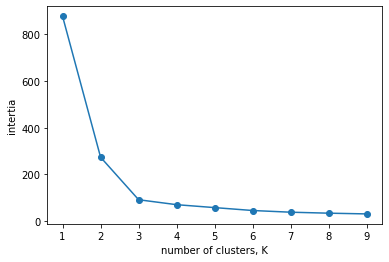

In [96]:
import matplotlib.pyplot as plt
intertias_values = []
ks = range(1, 10)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(iris_df)
    intertias_values.append(model.inertia_)

plt.plot(ks, intertias_values, '-o')
plt.xlabel('number of clusters, K')
plt.ylabel('intertia')
plt.xticks(ks)
plt.show()


#### 크로스 테이블 체크
* Cross Tabulation은 테이블 형태로 교차분석한 결과
* pandas의 .crosstab 함수를 사용한다.

In [97]:
cross_tab = pd.crosstab(iris_df['target'], iris_df['cluster'])
cross_tab

cluster,0,1,2
target,,,
0,0,50,0
1,2,0,48
2,36,0,14


#### 차원축소 
* 차원축소 한 데이터를 시각화하기

In [99]:
from sklearn.decomposition import PCA

#차원축소 = 2차원
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [100]:
#2차원으로 변환된 데이터를 pca_x, pca_y 라는 컬럼명으로 추가하기
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


In [101]:
iris_df['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

In [102]:
#cluster 별로 0,1,2 경우마다 index 추출
marker0_index = iris_df[iris_df['cluster'] == 0].index
print(marker0_index)
marker1_index = iris_df[iris_df['cluster'] == 1].index
print(marker1_index)
marker2_index = iris_df[iris_df['cluster'] == 2].index
print(marker2_index)

Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
            115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
            134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
           dtype='int64')
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')
Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
             64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
             78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
             91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
            119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
           dtype='int64')


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Component')

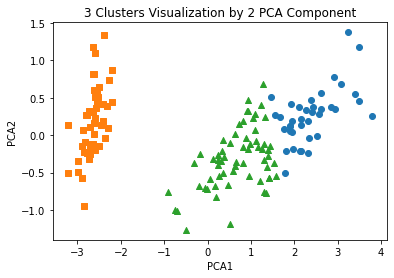

In [103]:
#cluster 값이 0,1,2에 해당하는 index와 pca_x 값을 X축에 설정
#cluster 값이 0,1,2에 해당하는 index와 pca_y 값을 Y축에 설정
#marker o, s, ^ 를 사용
#iris_df.loc[marker0_index,'pca_x']
plt.scatter(x=iris_df.loc[marker0_index,'pca_x'], \
            y=iris_df.loc[marker0_index,'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[marker1_index,'pca_x'], \
            y=iris_df.loc[marker1_index,'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[marker2_index,'pca_x'], \
            y=iris_df.loc[marker2_index,'pca_y'], marker='^')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters Visualization by 2 PCA Component')

### Wheat Seed Dataset  활용한 군집화


In [109]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    
seeds_dataset = StringIO("""15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1
16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1
14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1
14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1
14.11	14.1	0.8911	5.42	3.302	2.7	5	1
16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1
16.44	15.25	0.888	5.884	3.505	1.969	5.533	1
15.26	14.85	0.8696	5.714	3.242	4.543	5.314	1
14.03	14.16	0.8796	5.438	3.201	1.717	5.001	1
13.89	14.02	0.888	5.439	3.199	3.986	4.738	1
13.78	14.06	0.8759	5.479	3.156	3.136	4.872	1
13.74	14.05	0.8744	5.482	3.114	2.932	4.825	1
14.59	14.28	0.8993	5.351	3.333	4.185	4.781	1
13.99	13.83	0.9183	5.119	3.383	5.234	4.781	1
15.69	14.75	0.9058	5.527	3.514	1.599	5.046	1
14.7	14.21	0.9153	5.205	3.466	1.767	4.649	1
12.72	13.57	0.8686	5.226	3.049	4.102	4.914	1
14.16	14.4	0.8584	5.658	3.129	3.072	5.176	1
14.11	14.26	0.8722	5.52	3.168	2.688	5.219	1
15.88	14.9	0.8988	5.618	3.507	0.7651	5.091	1
12.08	13.23	0.8664	5.099	2.936	1.415	4.961	1
15.01	14.76	0.8657	5.789	3.245	1.791	5.001	1
16.19	15.16	0.8849	5.833	3.421	0.903	5.307	1
13.02	13.76	0.8641	5.395	3.026	3.373	4.825	1
12.74	13.67	0.8564	5.395	2.956	2.504	4.869	1
14.11	14.18	0.882	5.541	3.221	2.754	5.038	1
13.45	14.02	0.8604	5.516	3.065	3.531	5.097	1
13.16	13.82	0.8662	5.454	2.975	0.8551	5.056	1
15.49	14.94	0.8724	5.757	3.371	3.412	5.228	1
14.09	14.41	0.8529	5.717	3.186	3.92	5.299	1
13.94	14.17	0.8728	5.585	3.15	2.124	5.012	1
15.05	14.68	0.8779	5.712	3.328	2.129	5.36	1
16.12	15	0.9	5.709	3.485	2.27	5.443	1
16.2	15.27	0.8734	5.826	3.464	2.823	5.527	1
17.08	15.38	0.9079	5.832	3.683	2.956	5.484	1
14.8	14.52	0.8823	5.656	3.288	3.112	5.309	1
14.28	14.17	0.8944	5.397	3.298	6.685	5.001	1
13.54	13.85	0.8871	5.348	3.156	2.587	5.178	1
13.5	13.85	0.8852	5.351	3.158	2.249	5.176	1
13.16	13.55	0.9009	5.138	3.201	2.461	4.783	1
15.5	14.86	0.882	5.877	3.396	4.711	5.528	1
15.11	14.54	0.8986	5.579	3.462	3.128	5.18	1
13.8	14.04	0.8794	5.376	3.155	1.56	4.961	1
15.36	14.76	0.8861	5.701	3.393	1.367	5.132	1
14.99	14.56	0.8883	5.57	3.377	2.958	5.175	1
14.79	14.52	0.8819	5.545	3.291	2.704	5.111	1
14.86	14.67	0.8676	5.678	3.258	2.129	5.351	1
14.43	14.4	0.8751	5.585	3.272	3.975	5.144	1
15.78	14.91	0.8923	5.674	3.434	5.593	5.136	1
14.49	14.61	0.8538	5.715	3.113	4.116	5.396	1
14.33	14.28	0.8831	5.504	3.199	3.328	5.224	1
14.52	14.6	0.8557	5.741	3.113	1.481	5.487	1
15.03	14.77	0.8658	5.702	3.212	1.933	5.439	1
14.46	14.35	0.8818	5.388	3.377	2.802	5.044	1
14.92	14.43	0.9006	5.384	3.412	1.142	5.088	1
15.38	14.77	0.8857	5.662	3.419	1.999	5.222	1
12.11	13.47	0.8392	5.159	3.032	1.502	4.519	1
11.42	12.86	0.8683	5.008	2.85	2.7	4.607	1
11.23	12.63	0.884	4.902	2.879	2.269	4.703	1
12.36	13.19	0.8923	5.076	3.042	3.22	4.605	1
13.22	13.84	0.868	5.395	3.07	4.157	5.088	1
12.78	13.57	0.8716	5.262	3.026	1.176	4.782	1
12.88	13.5	0.8879	5.139	3.119	2.352	4.607	1
14.34	14.37	0.8726	5.63	3.19	1.313	5.15	1
14.01	14.29	0.8625	5.609	3.158	2.217	5.132	1
14.37	14.39	0.8726	5.569	3.153	1.464	5.3	1
12.73	13.75	0.8458	5.412	2.882	3.533	5.067	1
17.63	15.98	0.8673	6.191	3.561	4.076	6.06	2
16.84	15.67	0.8623	5.998	3.484	4.675	5.877	2
17.26	15.73	0.8763	5.978	3.594	4.539	5.791	2
19.11	16.26	0.9081	6.154	3.93	2.936	6.079	2
16.82	15.51	0.8786	6.017	3.486	4.004	5.841	2
16.77	15.62	0.8638	5.927	3.438	4.92	5.795	2
17.32	15.91	0.8599	6.064	3.403	3.824	5.922	2
20.71	17.23	0.8763	6.579	3.814	4.451	6.451	2
18.94	16.49	0.875	6.445	3.639	5.064	6.362	2
17.12	15.55	0.8892	5.85	3.566	2.858	5.746	2
16.53	15.34	0.8823	5.875	3.467	5.532	5.88	2
18.72	16.19	0.8977	6.006	3.857	5.324	5.879	2
20.2	16.89	0.8894	6.285	3.864	5.173	6.187	2
19.57	16.74	0.8779	6.384	3.772	1.472	6.273	2
19.51	16.71	0.878	6.366	3.801	2.962	6.185	2
18.27	16.09	0.887	6.173	3.651	2.443	6.197	2
18.88	16.26	0.8969	6.084	3.764	1.649	6.109	2
18.98	16.66	0.859	6.549	3.67	3.691	6.498	2
21.18	17.21	0.8989	6.573	4.033	5.78	6.231	2
20.88	17.05	0.9031	6.45	4.032	5.016	6.321	2
20.1	16.99	0.8746	6.581	3.785	1.955	6.449	2
18.76	16.2	0.8984	6.172	3.796	3.12	6.053	2
18.81	16.29	0.8906	6.272	3.693	3.237	6.053	2
18.59	16.05	0.9066	6.037	3.86	6.001	5.877	2
18.36	16.52	0.8452	6.666	3.485	4.933	6.448	2
16.87	15.65	0.8648	6.139	3.463	3.696	5.967	2
19.31	16.59	0.8815	6.341	3.81	3.477	6.238	2
18.98	16.57	0.8687	6.449	3.552	2.144	6.453	2
18.17	16.26	0.8637	6.271	3.512	2.853	6.273	2
18.72	16.34	0.881	6.219	3.684	2.188	6.097	2
16.41	15.25	0.8866	5.718	3.525	4.217	5.618	2
17.99	15.86	0.8992	5.89	3.694	2.068	5.837	2
19.46	16.5	0.8985	6.113	3.892	4.308	6.009	2
19.18	16.63	0.8717	6.369	3.681	3.357	6.229	2
18.95	16.42	0.8829	6.248	3.755	3.368	6.148	2
18.83	16.29	0.8917	6.037	3.786	2.553	5.879	2
18.85	16.17	0.9056	6.152	3.806	2.843	6.2	2
17.63	15.86	0.88	6.033	3.573	3.747	5.929	2
19.94	16.92	0.8752	6.675	3.763	3.252	6.55	2
18.55	16.22	0.8865	6.153	3.674	1.738	5.894	2
18.45	16.12	0.8921	6.107	3.769	2.235	5.794	2
19.38	16.72	0.8716	6.303	3.791	3.678	5.965	2
19.13	16.31	0.9035	6.183	3.902	2.109	5.924	2
19.14	16.61	0.8722	6.259	3.737	6.682	6.053	2
20.97	17.25	0.8859	6.563	3.991	4.677	6.316	2
19.06	16.45	0.8854	6.416	3.719	2.248	6.163	2
18.96	16.2	0.9077	6.051	3.897	4.334	5.75	2
19.15	16.45	0.889	6.245	3.815	3.084	6.185	2
18.89	16.23	0.9008	6.227	3.769	3.639	5.966	2
20.03	16.9	0.8811	6.493	3.857	3.063	6.32	2
20.24	16.91	0.8897	6.315	3.962	5.901	6.188	2
18.14	16.12	0.8772	6.059	3.563	3.619	6.011	2
16.17	15.38	0.8588	5.762	3.387	4.286	5.703	2
18.43	15.97	0.9077	5.98	3.771	2.984	5.905	2
15.99	14.89	0.9064	5.363	3.582	3.336	5.144	2
18.75	16.18	0.8999	6.111	3.869	4.188	5.992	2
18.65	16.41	0.8698	6.285	3.594	4.391	6.102	2
17.98	15.85	0.8993	5.979	3.687	2.257	5.919	2
20.16	17.03	0.8735	6.513	3.773	1.91	6.185	2
17.55	15.66	0.8991	5.791	3.69	5.366	5.661	2
18.3	15.89	0.9108	5.979	3.755	2.837	5.962	2
18.94	16.32	0.8942	6.144	3.825	2.908	5.949	2
15.38	14.9	0.8706	5.884	3.268	4.462	5.795	2
16.16	15.33	0.8644	5.845	3.395	4.266	5.795	2
15.56	14.89	0.8823	5.776	3.408	4.972	5.847	2
15.38	14.66	0.899	5.477	3.465	3.6	5.439	2
17.36	15.76	0.8785	6.145	3.574	3.526	5.971	2
15.57	15.15	0.8527	5.92	3.231	2.64	5.879	2
15.6	15.11	0.858	5.832	3.286	2.725	5.752	2
16.23	15.18	0.885	5.872	3.472	3.769	5.922	2
13.07	13.92	0.848	5.472	2.994	5.304	5.395	3
13.32	13.94	0.8613	5.541	3.073	7.035	5.44	3
13.34	13.95	0.862	5.389	3.074	5.995	5.307	3
12.22	13.32	0.8652	5.224	2.967	5.469	5.221	3
11.82	13.4	0.8274	5.314	2.777	4.471	5.178	3
11.21	13.13	0.8167	5.279	2.687	6.169	5.275	3
11.43	13.13	0.8335	5.176	2.719	2.221	5.132	3
12.49	13.46	0.8658	5.267	2.967	4.421	5.002	3
12.7	13.71	0.8491	5.386	2.911	3.26	5.316	3
10.79	12.93	0.8107	5.317	2.648	5.462	5.194	3
11.83	13.23	0.8496	5.263	2.84	5.195	5.307	3
12.01	13.52	0.8249	5.405	2.776	6.992	5.27	3
12.26	13.6	0.8333	5.408	2.833	4.756	5.36	3
11.18	13.04	0.8266	5.22	2.693	3.332	5.001	3
11.36	13.05	0.8382	5.175	2.755	4.048	5.263	3
11.19	13.05	0.8253	5.25	2.675	5.813	5.219	3
11.34	12.87	0.8596	5.053	2.849	3.347	5.003	3
12.13	13.73	0.8081	5.394	2.745	4.825	5.22	3
11.75	13.52	0.8082	5.444	2.678	4.378	5.31	3
11.49	13.22	0.8263	5.304	2.695	5.388	5.31	3
12.54	13.67	0.8425	5.451	2.879	3.082	5.491	3
12.02	13.33	0.8503	5.35	2.81	4.271	5.308	3
12.05	13.41	0.8416	5.267	2.847	4.988	5.046	3
12.55	13.57	0.8558	5.333	2.968	4.419	5.176	3
11.14	12.79	0.8558	5.011	2.794	6.388	5.049	3
12.1	13.15	0.8793	5.105	2.941	2.201	5.056	3
12.44	13.59	0.8462	5.319	2.897	4.924	5.27	3
12.15	13.45	0.8443	5.417	2.837	3.638	5.338	3
11.35	13.12	0.8291	5.176	2.668	4.337	5.132	3
11.24	13	0.8359	5.09	2.715	3.521	5.088	3
11.02	13	0.8189	5.325	2.701	6.735	5.163	3
11.55	13.1	0.8455	5.167	2.845	6.715	4.956	3
11.27	12.97	0.8419	5.088	2.763	4.309	5	3
11.4	13.08	0.8375	5.136	2.763	5.588	5.089	3
10.83	12.96	0.8099	5.278	2.641	5.182	5.185	3
10.8	12.57	0.859	4.981	2.821	4.773	5.063	3
11.26	13.01	0.8355	5.186	2.71	5.335	5.092	3
10.74	12.73	0.8329	5.145	2.642	4.702	4.963	3
11.48	13.05	0.8473	5.18	2.758	5.876	5.002	3
12.21	13.47	0.8453	5.357	2.893	1.661	5.178	3
11.41	12.95	0.856	5.09	2.775	4.957	4.825	3
12.46	13.41	0.8706	5.236	3.017	4.987	5.147	3
12.19	13.36	0.8579	5.24	2.909	4.857	5.158	3
11.65	13.07	0.8575	5.108	2.85	5.209	5.135	3
12.89	13.77	0.8541	5.495	3.026	6.185	5.316	3
11.56	13.31	0.8198	5.363	2.683	4.062	5.182	3
11.81	13.45	0.8198	5.413	2.716	4.898	5.352	3
10.91	12.8	0.8372	5.088	2.675	4.179	4.956	3
11.23	12.82	0.8594	5.089	2.821	7.524	4.957	3
10.59	12.41	0.8648	4.899	2.787	4.975	4.794	3
10.93	12.8	0.839	5.046	2.717	5.398	5.045	3
11.27	12.86	0.8563	5.091	2.804	3.985	5.001	3
11.87	13.02	0.8795	5.132	2.953	3.597	5.132	3
10.82	12.83	0.8256	5.18	2.63	4.853	5.089	3
12.11	13.27	0.8639	5.236	2.975	4.132	5.012	3
12.8	13.47	0.886	5.16	3.126	4.873	4.914	3
12.79	13.53	0.8786	5.224	3.054	5.483	4.958	3
13.37	13.78	0.8849	5.32	3.128	4.67	5.091	3
12.62	13.67	0.8481	5.41	2.911	3.306	5.231	3
12.76	13.38	0.8964	5.073	3.155	2.828	4.83	3
12.38	13.44	0.8609	5.219	2.989	5.472	5.045	3
12.67	13.32	0.8977	4.984	3.135	2.3	4.745	3
11.18	12.72	0.868	5.009	2.81	4.051	4.828	3
12.7	13.41	0.8874	5.183	3.091	8.456	5	3
12.37	13.47	0.8567	5.204	2.96	3.919	5.001	3
12.19	13.2	0.8783	5.137	2.981	3.631	4.87	3
11.23	12.88	0.8511	5.14	2.795	4.325	5.003	3
13.2	13.66	0.8883	5.236	3.232	8.315	5.056	3
11.84	13.21	0.8521	5.175	2.836	3.598	5.044	3
12.3	13.34	0.8684	5.243	2.974	5.637	5.063	3""")

In [110]:
col_names = ['Area','Perimeter','Compactness','Kernel.Length',\
            'Kernel.Width','Asymmetry.Coeff','Kernel.Groove','Type']
wheat_df = pd.read_csv(seeds_dataset, delimiter='\t')
wheat_df.columns = col_names
print(wheat_df.shape)
wheat_df.head()

(209, 8)


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [111]:
wheat_df['Type'].value_counts()

3    70
2    70
1    69
Name: Type, dtype: int64

In [112]:
feature_df = wheat_df.drop(columns=['Type'],axis=1, inplace=False)
print(feature_df.columns)
feature_df.head()

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove'],
      dtype='object')


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956


In [115]:
#KMeans 모델 생성
model = KMeans(max_iter=500, n_clusters=3, random_state=0)
model.fit(feature_df)

KMeans(max_iter=500, n_clusters=3, random_state=0)

In [116]:
print(model.labels_)
wheat_df['cluster'] = model.labels_
wheat_df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type,cluster
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0


In [117]:
wheat_group = wheat_df.groupby(['Type','cluster'])['Area'].count()
wheat_group

Type  cluster
1     0          59
      1           1
      2           9
2     0          10
      1          60
3     0           2
      2          68
Name: Area, dtype: int64

In [118]:
wheat_df['cluster'].value_counts()

2    77
0    71
1    61
Name: cluster, dtype: int64

In [119]:
print(type(feature_df.values))
pca_data = feature_df.values
#몇차원인지를 확인하는 속성
print(pca_data.ndim)
pca_data

<class 'numpy.ndarray'>
2


array([[14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955, ...,  3.379 ,  2.259 ,  4.805 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [122]:
#모델생성
pca = PCA(n_components=2)
#학습하기 2개의 컴포넌트로 차원축소
pca_transformed = pca.fit_transform(feature_df.values)

In [123]:
wheat_df['pca_x'] = pca_transformed[:,0]
wheat_df['pca_y'] = pca_transformed[:,1]
wheat_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type,cluster,pca_x,pca_y
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0,0.317423,-2.696038
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0,-0.657925,-1.137870
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0,-1.052957,-1.627343
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0,1.622026,-2.190952
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0,-0.474469,-1.342968


Text(0.5, 1.0, 'Wheat Data 3 Clusters Visualization by 2 PCA Component')

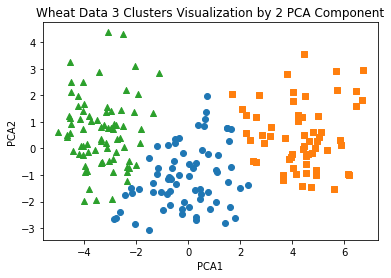

In [124]:
marker0_index = wheat_df[wheat_df['cluster'] == 0].index
marker1_index = wheat_df[wheat_df['cluster'] == 1].index
marker2_index = wheat_df[wheat_df['cluster'] == 2].index

plt.scatter(x=wheat_df.loc[marker0_index,'pca_x'],\
            y=wheat_df.loc[marker0_index,'pca_y'], marker='o')
plt.scatter(x=wheat_df.loc[marker1_index,'pca_x'],\
            y=wheat_df.loc[marker1_index,'pca_y'], marker='s')
plt.scatter(x=wheat_df.loc[marker2_index,'pca_x'],\
            y=wheat_df.loc[marker2_index,'pca_y'], marker='^')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wheat Data 3 Clusters Visualization by 2 PCA Component')